In [25]:
import os
import cv2
from tensorflow.keras import layers
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
dataset_dir = "test"
label_list = []
img_list = []
img_height, img_width = 60, 60
class_number = 0
counter = 0
for dir_name in os.listdir(dataset_dir):
    class_number = class_number + 1
    images_path = os.path.join(dataset_dir, dir_name)
    print(counter)
    counter = counter + 1
    for img in os.listdir(images_path):
        if counter==21:
            print(img_path)
        img_path = os.path.join(images_path, img)
        try:
            img = cv2.imread(img_path)
            img = cv2.resize(img, (img_height, img_width))
            img_list.append(img)
            label_list.append(dir_name)
        except:
            print(img_path)
           


0


In [17]:
test_size = 0.2
labels = tf.keras.utils.to_categorical(label_list)
x_train, x_test, y_train, y_test = train_test_split(np.array(img_list), np.array(labels),
                 test_size=test_size)        


In [8]:
import os
import cv2
from tensorflow.keras import layers
import tensorflow as tf
import numpy as np
img_height, img_width = 60, 60
class_number = 135
model1 = tf.keras.Sequential([
layers.experimental.preprocessing.Rescaling(1./255,input_shape=(img_height, img_width, 3)),
   layers.Conv2D(32, (3, 3), activation = 'relu', input_shape=(img_width, img_height, 3)),
   layers.MaxPooling2D(pool_size=(2, 2)),
   layers.Flatten(),
   layers.Dense(128, activation='relu'),
   layers.Dropout(0.5),
   layers.Dense(class_number, activation='softmax')])

model2 = tf.keras.Sequential([
layers.experimental.preprocessing.Rescaling(1./255,input_shape=(img_height, img_width, 3)),
   layers.Conv2D(32, (3, 3), activation = 'relu', input_shape=(img_width, img_height, 3)),
   layers.MaxPooling2D(pool_size=(2, 2)),
   layers.Conv2D(64, (3,3), activation = 'relu'),
   layers.MaxPooling2D(pool_size=(2, 2)),
   layers.Flatten(),
   layers.Dense(128, activation='relu'),
   layers.Dropout(0.5),
   layers.Dense(class_number, activation='softmax')])

In [12]:
model2.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_4 (Rescaling)      (None, 60, 60, 3)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 58, 58, 32)        896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 29, 29, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 27, 27, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 10816)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)              

In [19]:
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
epoch = 20
history1 = model1.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epoch)
history2 = model2.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epoch)

Epoch 1/20
2627/2627 [==============================] - 199s 75ms/step - loss: 3.4551 - accuracy: 0.1735 - val_loss: 0.9574 - val_accuracy: 0.7846
Epoch 2/20
2627/2627 [==============================] - 202s 77ms/step - loss: 2.0343 - accuracy: 0.3886 - val_loss: 0.6826 - val_accuracy: 0.8346
Epoch 3/20
2627/2627 [==============================] - 202s 77ms/step - loss: 1.8242 - accuracy: 0.4402 - val_loss: 0.5719 - val_accuracy: 0.8605
Epoch 4/20
2627/2627 [==============================] - 201s 76ms/step - loss: 1.6230 - accuracy: 0.4961 - val_loss: 0.5385 - val_accuracy: 0.8522
Epoch 5/20
2627/2627 [==============================] - 191s 73ms/step - loss: 1.4930 - accuracy: 0.5294 - val_loss: 0.4784 - val_accuracy: 0.8647
Epoch 6/20
2627/2627 [==============================] - 187s 71ms/step - loss: 1.4002 - accuracy: 0.5579 - val_loss: 0.4385 - val_accuracy: 0.8797
Epoch 7/20
2627/2627 [==============================] - 198s 75ms/step - loss: 1.3338 - accuracy: 0.5768 - val_loss: 0

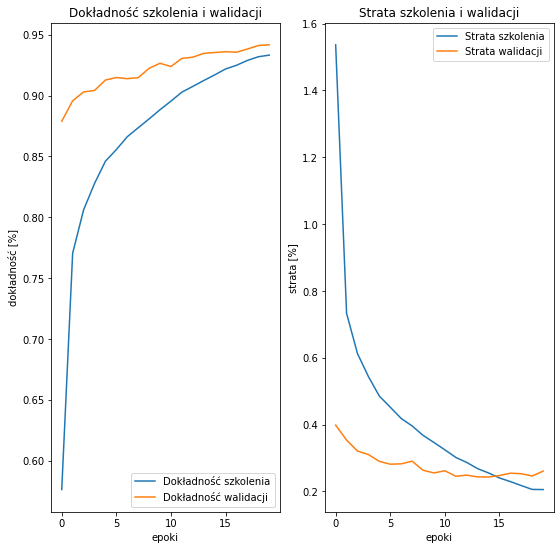

In [24]:
import matplotlib.pyplot as plt
history = history2
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epoch)

plt.figure(figsize=(9, 9))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Dokładność szkolenia')
plt.plot(epochs_range, val_acc, label='Dokładność walidacji')
plt.legend(loc='lower right')
plt.title('Dokładność szkolenia i walidacji')
plt.xlabel('epoki')
plt.ylabel('dokładność [%]')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Strata szkolenia')
plt.plot(epochs_range, val_loss, label='Strata walidacji')
plt.legend(loc='upper right')
plt.title('Strata szkolenia i walidacji')
plt.xlabel('epoki')
plt.ylabel('strata [%]')
plt.show()


[129]


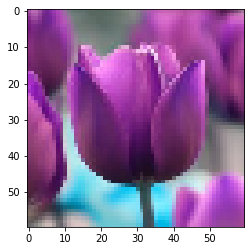

In [59]:
x = np.expand_dims(img_list[4], axis=0)
print(model2.predict_classes(x))
img = plt.imshow(img_list[4])
plt.show()

In [ ]:
for i in range(10):
    model = tf.keras.Sequential([
        layers.experimental.preprocessing.Rescaling(1./255,input_shape=(img_height, img_width, 3)),
        layers.Conv2D(32, (3, 3), activation = 'relu', input_shape=(img_width, img_height, 3)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(class_number, activation='softmax')])
  
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    epoch = 10
    try:
        with tf.device('/GPU:0'):
            history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epoch)
    except RuntimeError as e:
        print(e)

  



Epoch 1/10
465/465 [==============================] - 8s 4ms/step - loss: 3.1000 - accuracy: 0.0953 - val_loss: 2.5005 - val_accuracy: 0.2546
Epoch 2/10
465/465 [==============================] - 2s 4ms/step - loss: 2.5393 - accuracy: 0.2067 - val_loss: 2.2657 - val_accuracy: 0.3210
Epoch 3/10
465/465 [==============================] - 2s 4ms/step - loss: 2.3335 - accuracy: 0.2713 - val_loss: 2.1229 - val_accuracy: 0.3406
Epoch 4/10
465/465 [==============================] - 2s 4ms/step - loss: 2.1170 - accuracy: 0.3191 - val_loss: 2.0051 - val_accuracy: 0.4089
Epoch 5/10
465/465 [==============================] - 2s 4ms/step - loss: 1.9449 - accuracy: 0.3785 - val_loss: 1.9058 - val_accuracy: 0.4387
Epoch 6/10
465/465 [==============================] - 2s 4ms/step - loss: 1.7857 - accuracy: 0.4190 - val_loss: 1.8443 - val_accuracy: 0.4634
Epoch 7/10
465/465 [==============================] - 2s 4ms/step - loss: 1.6562 - accuracy: 0.4527 - val_loss: 1.7389 - val_accuracy: 0.5005
Epoch 